# Prediction for stage 1 of landing of Falcon 9



## capstone project
**Business Problem:** It will be predicted if the first stages of falcon 9 is usable again or not. so we should be sure if the landing is successful or not. It is important to know the reusibility of stages because the cost of landing of other providers are about 165 million dollar however Space X spends about 62 and defintely it will be useful for new entrance.
the data will be collected from wikipedia. In this lab, you will be performing web scraping to collect Falcon 9 historical launch records from a Wikipedia page titled List of Falcon 9 and Falcon Heavy launches

https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches

the problem is classification supervised learning.

Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class Y
*   Standardize the data X
*   Split into training data and test data

Find tuned Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method by using grid search for test data 

In [2]:

!pip install beautifulsoup4
!pip install requests
!pip install unicodedata

#import the library of request for collecting data from web scraping 
import requests
from bs4 import BeautifulSoup
import unicodedata

#  for data manipulation and analysis
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Datetime is a library that allows us to represent dates
import datetime

#print all columns of dataframe with more details
pd.set_option('display.max_columns',None)
#print all features of dataframe for more detailes
pd.set_option('display.max_colwidth',None)

#for visulization
import seaborn as sns
import matplotlib.pyplot as plt
# for cleansing
from sklearn.preprocessing import LabelEncoder
#slpit dataset
from sklearn.model_selection import train_test_split
#standardization

from sklearn import preprocessing
#modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


#optimizated parameters
from sklearn.model_selection import GridSearchCV

#Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay


ERROR: Could not find a version that satisfies the requirement unicodedata (from versions: none)
ERROR: No matching distribution found for unicodedata


In [55]:
# and it will provide some helper functions to process web scraped HTML table

def date_time(table_cells):
    """
    This function returns the data and time from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    """
    This function returns the booster version from the HTML  table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass


def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name 

In [2]:
def heat_confusion(ytest,pre):
    cm=confusion_matrix(ytest,pre)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

##### request launch data from SpaceX API with URL:
Web scrap Falcon 9 launch records with BeautifulSoup:

    Extract a Falcon 9 launch records HTML table from Wikipedia
    Parse the table and convert it into a Pandas data frame
To keep the lab tasks consistent, you will be asked to scrape the data from a snapshot of the List of Falcon 9 and Falcon Heavy launches Wikipage updated on 9th June 2021


In [56]:
URL="https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

In [57]:
page=requests.get(URL)

In [58]:
# requesting data is okay
page.status_code

200

In [59]:
# the content is in Json format
page.text


'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled";(function()

In [22]:
#convert text page to html by using library of soup
soup=BeautifulSoup(page.text,'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled";(function(){var 

In [60]:
soup.title

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>

In [61]:
#for calling all the tables
html_tables=soup.find_all('table')
html_tables[2]


<table class="wikitable plainrowheaders collapsible" style="width: 100%;">
<tbody><tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date andtime ()
</th>
<th scope="col">
</th>
<th scope="col">Launchsite
</th>
<th scope="col">Payload
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launchoutcome
</th>
<th scope="col">
</th></tr>
<tr id="F9-078">
<th rowspan="2" scope="row" style="text-align:center;">78
</th>
<td>7 January 2020,<br/>02:19:21<sup class="reference" id="cite_ref-19"><a href="#cite_note-19">[13]</a></sup>
</td>
<td><a href="/wiki/Falcon_9_Block_5" title="Falcon 9 Block 5">F9 B5</a> ♺ <br/><a class="mw-redirect" href="/wiki/Falcon_9_booster_B1049" title="Falcon 9 booster B1049">B1049.4</a>
</td>
<td><a href="/wiki/Cape_Canaveral_Space_Force_Station" title="Cape Canaveral Space Force Station">CCSFS</a>,<br/><a href="/wiki/Cape_Canaveral_Space_Launch_Complex_40" title="Cape Canaveral Space Launch Complex 40

In [62]:
first_launch_table = html_tables[2]
print(first_launch_table)

<table class="wikitable plainrowheaders collapsible" style="width: 100%;">
<tbody><tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date andtime ()
</th>
<th scope="col">
</th>
<th scope="col">Launchsite
</th>
<th scope="col">Payload
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launchoutcome
</th>
<th scope="col">
</th></tr>
<tr id="F9-078">
<th rowspan="2" scope="row" style="text-align:center;">78
</th>
<td>7 January 2020,<br/>02:19:21<sup class="reference" id="cite_ref-19"><a href="#cite_note-19">[13]</a></sup>
</td>
<td><a href="/wiki/Falcon_9_Block_5" title="Falcon 9 Block 5">F9 B5</a> ♺ <br/><a class="mw-redirect" href="/wiki/Falcon_9_booster_B1049" title="Falcon 9 booster B1049">B1049.4</a>
</td>
<td><a href="/wiki/Cape_Canaveral_Space_Force_Station" title="Cape Canaveral Space Force Station">CCSFS</a>,<br/><a href="/wiki/Cape_Canaveral_Space_Launch_Complex_40" title="Cape Canaveral Space Launch Complex 40

In [63]:
columns_name=[]
for i in first_launch_table.find_all('th'):
    if extract_column_from_header(i)!=None:
        if len(extract_column_from_header(i))>0:
            columns_name.append(extract_column_from_header(i))
            

In [64]:
print(columns_name)

['Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome']


In [69]:
launch_dict= dict.fromkeys(columns_name)

# Remove an irrelvant column
del launch_dict['Date and time ( )']

# Let's initial the launch_dict with each value to be an empty list
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
# Added some new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

In [70]:
extracted_row = 0
#Extract each table 
for table_number,table in enumerate(soup.find_all('table',"wikitable plainrowheaders collapsible")):
   # get table row 
    for rows in table.find_all("tr"):
        #check to see if first table heading is as number corresponding to launch a number 
        if rows.th:
            if rows.th.string:
                flight_number=rows.th.string.strip()
                flag=flight_number.isdigit()
        else:
            flag=False
        #get table element 
        row=rows.find_all('td')
        #if it is number save cells in a dictonary 
        if flag:
            extracted_row += 1
            # Flight Number value
            # TODO: Append the flight_number into launch_dict with key `Flight No.`
            launch_dict['Flight No.'].append(flight_number)
            print(flight_number)
            datatimelist=date_time(row[0])
            
            # Date value
            # TODO: Append the date into launch_dict with key `Date`
            date = datatimelist[0].strip(',')
            launch_dict['Date'].append(date)
            print(date)
            
            # Time value
            # TODO: Append the time into launch_dict with key `Time`
            time = datatimelist[1]
            launch_dict['Time'].append(time)
            print(time)
              
            # Booster version
            # TODO: Append the bv into launch_dict with key `Version Booster`
            bv=booster_version(row[1])
            if not(bv):
                bv=row[1].a.string
            launch_dict['Version Booster'].append(bv)
            print(bv)
            
            # Launch Site
            # TODO: Append the bv into launch_dict with key `Launch Site`
            launch_site = row[2].a.string
            launch_dict['Launch site'].append(launch_site)
            print(launch_site)
            
            # Payload
            # TODO: Append the payload into launch_dict with key `Payload`
            payload = row[3].a.string
            launch_dict['Payload'].append(payload)
            print(payload)
            
            # Payload Mass
            # TODO: Append the payload_mass into launch_dict with key `Payload mass`
            payload_mass = get_mass(row[4])
            launch_dict['Payload mass'].append(payload_mass)
            print(payload_mass)
            
            # Orbit
            # TODO: Append the orbit into launch_dict with key `Orbit`
            orbit = row[5].a.string
            launch_dict['Orbit'].append(orbit)
            print(orbit)
            
            # Customer
            # TODO: Append the customer into launch_dict with key `Customer`
            if row[6].a!=None:
                customer = row[6].a.string
            else: 
                customer='None'
            launch_dict['Customer'].append(customer)
            print(customer)
            
            # Launch outcome
            # TODO: Append the launch_outcome into launch_dict with key `Launch outcome`
            launch_outcome = list(row[7].strings)[0]
            launch_dict['Launch outcome'].append(launch_outcome)
            print(launch_outcome)
            
            # Booster landing
            # TODO: Append the launch_outcome into launch_dict with key `Booster landing`
            booster_landing = landing_status(row[8])
            launch_dict['Booster landing'].append(booster_landing)
            print(booster_landing)
            
            print("******")
            

78
7 January 2020
02:19:21
F9 B5
CCSFS
Starlink
15,600 kg
LEO
SpaceX
Success

Success
******
79
19 January 2020
15:30
F9 B5
KSC
Crew Dragon in-flight abort test
12,050 kg
Sub-orbital
NASA
Success

No attempt

******
80
29 January 2020
14:07
F9 B5
CCSFS
Starlink
15,600 kg
LEO
SpaceX
Success

Success
******
81
17 February 2020
15:05
F9 B5
CCSFS
Starlink
15,600 kg
LEO
SpaceX
Success

Failure
******
82
7 March 2020
04:50
F9 B5
CCSFS
SpaceX CRS-20
1,977 kg
LEO
NASA
Success

Success
******
83
18 March 2020
12:16
F9 B5
KSC
Starlink
15,600 kg
LEO
SpaceX
Success

Failure
******
84
22 April 2020
19:30
F9 B5
KSC
Starlink
15,600 kg
LEO
SpaceX
Success

Success
******
85
30 May 2020
19:22
F9 B5B1058.1
KSC
Crew Dragon Demo-2
12,530 kg
LEO
NASA
Success

Success
******
86
4 June 2020
01:25
F9 B5
CCSFS
Starlink
15,600 kg
LEO
SpaceX
Success

Success
******
87
13 June 2020
09:21
F9 B5
CCSFS
Starlink
15,410 kg
LEO
SpaceX
Success

Success
******
88
30 June 2020
20:10:46
F9 B5
CCSFS
GPS III
4,311 kg
MEO
U.S.

In [76]:
df=pd.DataFrame(launch_dict)

In [77]:
df.shape

(126, 11)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Flight No.       126 non-null    object
 1   Launch site      126 non-null    object
 2   Payload          120 non-null    object
 3   Payload mass     126 non-null    object
 4   Orbit            126 non-null    object
 5   Customer         126 non-null    object
 6   Launch outcome   126 non-null    object
 7   Version Booster  126 non-null    object
 8   Booster landing  126 non-null    object
 9   Date             126 non-null    object
 10  Time             126 non-null    object
dtypes: object(11)
memory usage: 11.0+ KB


In [79]:
columns=df.columns
columns

Index(['Flight No.', 'Launch site', 'Payload', 'Payload mass', 'Orbit',
       'Customer', 'Launch outcome', 'Version Booster', 'Booster landing',
       'Date', 'Time'],
      dtype='object')

We can now export it to a CSV for the next section, but to make the answers consistent and in case you have difficulties finishing this lab.

Following labs will be using a provided dataset to make each lab independent.


In [88]:
df.to_csv('spacex_web_scraped.csv', index=False)

we want to extract these new features from the new dataset:
* From the rocket we would like to learn the booster name
* From the payload we would like to learn the mass of the payload and the orbit that it is going to
* From the launchpad we would like to know the name of the launch site being used, the longitude, and the latitude.
* From cores we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, whether the core is reused, whether legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.

The data from these requests will be stored in lists and will be used to create a new dataframe.



### Exploratory data analysis(EDA)
This phase is important to figure out the data undrestanding, for last column "Class" it is our target and shows the success of langing if it is equal to one otherwise it is zero. Regarding to other features which have impact on it we want to predict 1 or 0. 

Orbit is considered as informative column to predict. it includes the data of entering rockets to which orbits.
Launchsite is the loction of landing.
Outcome/True are the successful category.

We can omit thses 3 columns:
* LaunchSite, Latitude and Longitude are meaning the same. so it is possible to keep just one of them. rember all the time we should just keep one of the same columns and remove the others.infact they the same value.
* Boosterversion is identical for all flightnumbers.
* Serial do not give particular information.

In [80]:

sns.countplot(df['Class'])


KeyError: 'Class'

In [81]:
#
bool_features=df.dtypes==bool
bool_features = df.columns[bool_features].tolist()
bool_features

[]

In [82]:
for i in range(len(bool_features)):
    df[bool_features[i]].value_counts().plot(kind='bar',subplots=True,figsize=(5,2))
    plt.xticks(rotation='vertical')
    plt.ylabel(bool_features[i]) 
    plt.show()


In [83]:
df=df.drop('Date',axis=1)

In [84]:
categorical_feat=df.dtypes==object 
categorical_feat=df.columns[categorical_feat].tolist()
categorical_feat

['Flight No.',
 'Launch site',
 'Payload',
 'Payload mass',
 'Orbit',
 'Customer',
 'Launch outcome',
 'Version Booster',
 'Booster landing',
 'Time']

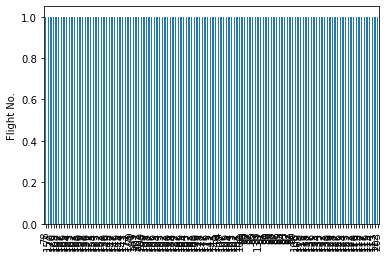

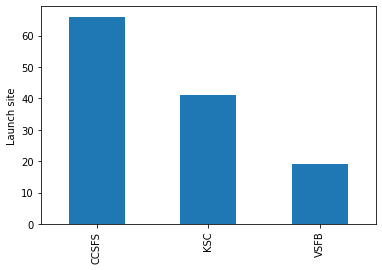

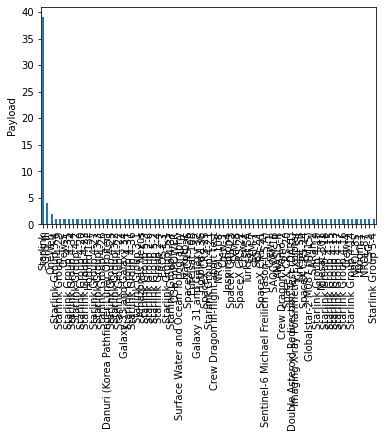

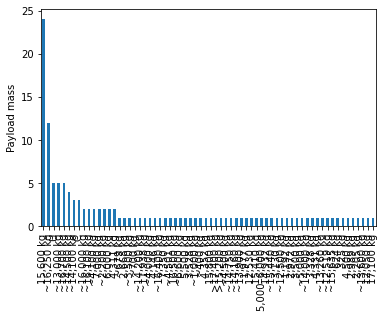

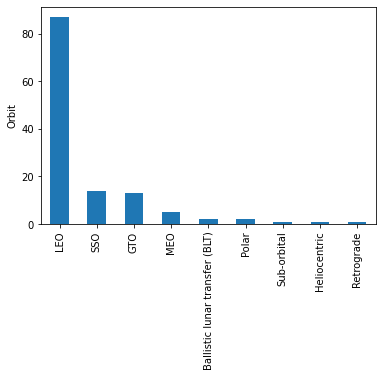

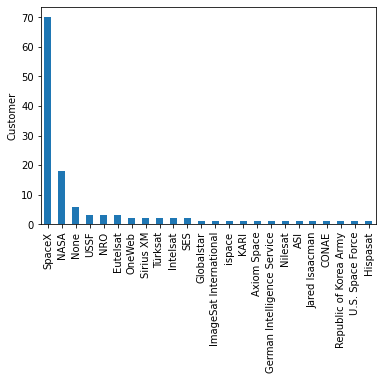

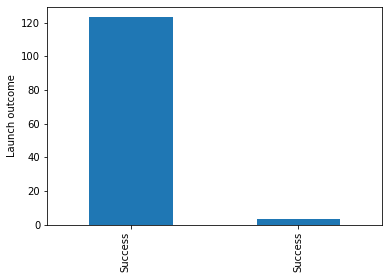

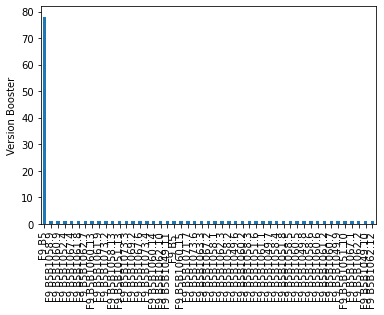

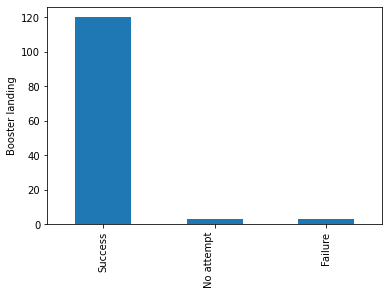

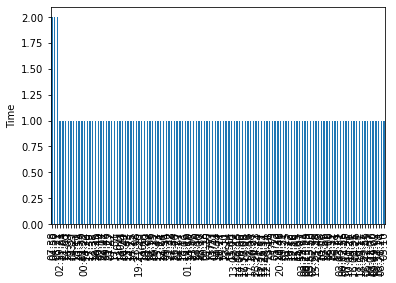

In [85]:
#use for categorical data
for i in range (len(categorical_feat)):
    df[categorical_feat[i]].value_counts().plot(kind="bar")
    plt.ylabel(categorical_feat[i]) 
    plt.show()


In [87]:
df["Version Booster"]

0              F9 B5
1              F9 B5
2              F9 B5
3              F9 B5
4              F9 B5
           ...      
121            F9 B5
122     F9 B5B1071.7
123            F9 B5
124     F9 B5B1073.6
125    F9 B5B1062.12
Name: Version Booster, Length: 126, dtype: object

In [16]:
# not important information due to its identical data in column
set(df["BoosterVersion"])

{'Falcon 9'}

In [17]:
df["PayloadMass"].describe()


count       90.000000
mean      6104.959412
std       4694.671720
min        350.000000
25%       2510.750000
50%       4701.500000
75%       8912.750000
max      15600.000000
Name: PayloadMass, dtype: float64

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

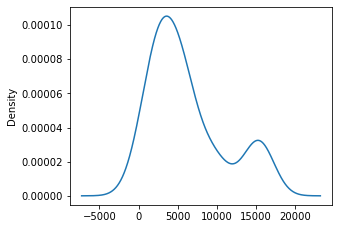

In [18]:
df["PayloadMass"].plot(kind='kde',subplots=True,figsize=(16,8),layout=(2,3), sharex=False)

array([[<AxesSubplot:title={'center':'FlightNumber'}>,
        <AxesSubplot:title={'center':'PayloadMass'}>,
        <AxesSubplot:title={'center':'Flights'}>],
       [<AxesSubplot:title={'center':'Block'}>,
        <AxesSubplot:title={'center':'ReusedCount'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>]],
      dtype=object)

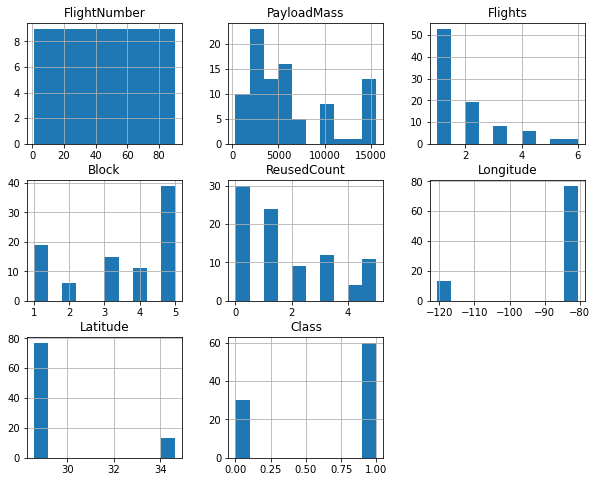

In [19]:
# use for numerical data
df.hist(figsize=[10,8])

In [20]:
df.shape

(90, 18)

In [196]:
df=df.drop(['BoosterVersion','Latitude','Longitude'],axis=1)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   PayloadMass   90 non-null     float64
 2   Orbit         90 non-null     object 
 3   LaunchSite    90 non-null     object 
 4   Outcome       90 non-null     object 
 5   Flights       90 non-null     int64  
 6   GridFins      90 non-null     bool   
 7   Reused        90 non-null     bool   
 8   Legs          90 non-null     bool   
 9   LandingPad    64 non-null     object 
 10  Block         90 non-null     float64
 11  ReusedCount   90 non-null     int64  
 12  Serial        90 non-null     object 
 13  Class         90 non-null     int64  
dtypes: bool(3), float64(2), int64(4), object(5)
memory usage: 8.1+ KB


### Visulize the relationship between Flight Numbers and Payload Mass, Launchsite

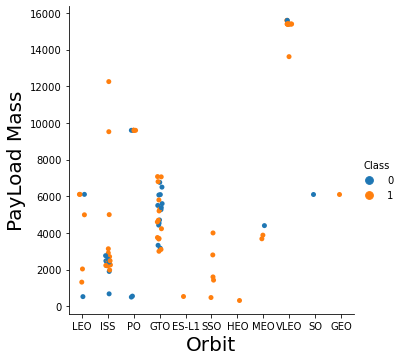

In [23]:
sns.catplot(y='PayloadMass',x='Orbit',hue="Class",data=df,aspect=1)
plt.xlabel('Orbit',fontsize=20)
plt.ylabel('PayLoad Mass',fontsize=20)
plt.show()

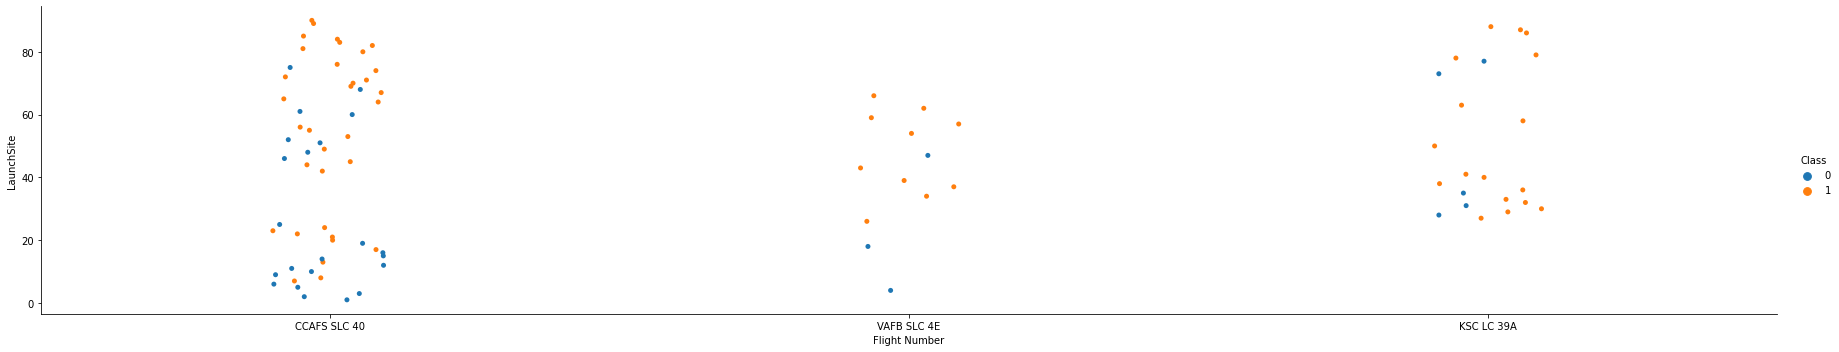

In [24]:
sns.catplot(y='FlightNumber',x='LaunchSite',data=df,hue='Class',aspect=5)
plt.xlabel('Flight Number')
plt.ylabel('LaunchSite')
plt.show()

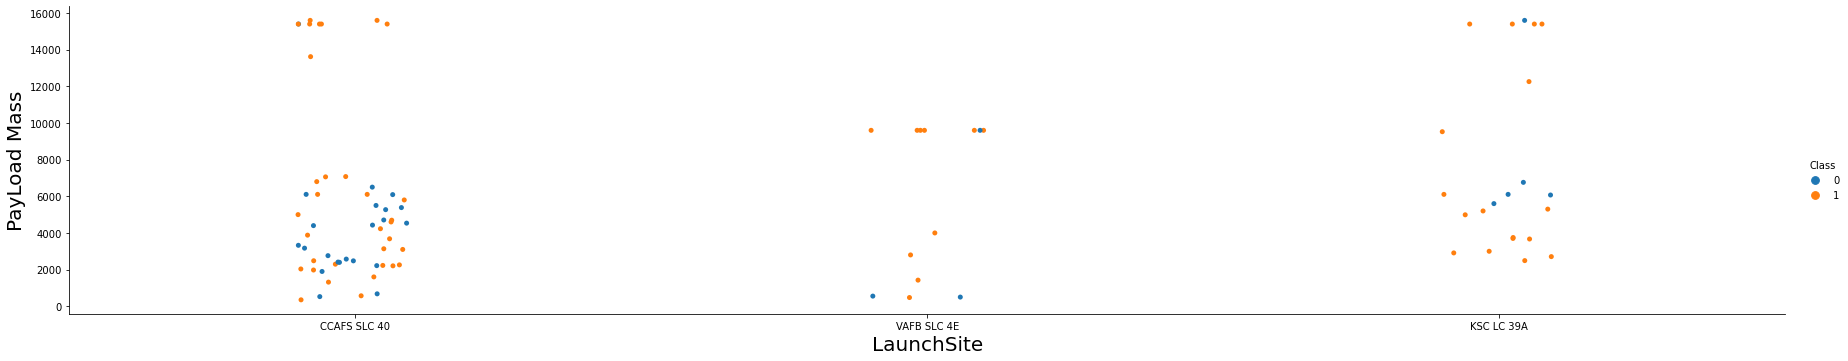

In [25]:
#the most landing in the first site 
sns.catplot(y='PayloadMass',x='LaunchSite',hue="Class",data=df,aspect=5)
plt.xlabel('LaunchSite',fontsize=20)
plt.ylabel('PayLoad Mass',fontsize=20)
plt.show()

## Preprocessing and Cleansing
#### dealing with missing data

* regarding to the domain knowlegde filling out LaunchSite, we can not filling out by max count from value count becuse the max frequency of landing pad is "5e9e3032383ecb6bb234e7ca " however the Orbit is related to this value is VLEO but there are also other orbit for this value. so max count for filling out is not good solution. we can not be sure about the accuracy of VELO for the all orbits of 5e9e3032383ecb6bb234e7ca. so thecnical and domain knowlegde will help.

In [26]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,1.000000


In [27]:

df['LandingPad'].value_counts()

5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: LandingPad, dtype: int64

In [11]:
df['LandingPad']=df['LandingPad'].fillna(df['LandingPad'].mode()[0])

In [12]:
df['LandingPad'].value_counts()

5e9e3032383ecb6bb234e7ca    61
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: LandingPad, dtype: int64

In [13]:
df[['LandingPad','Orbit']]


,LandingPad,Orbit
0,5e9e3032383ecb6bb234e7ca,LEO
1,5e9e3032383ecb6bb234e7ca,LEO
2,5e9e3032383ecb6bb234e7ca,ISS
3,5e9e3032383ecb6bb234e7ca,PO
4,5e9e3032383ecb6bb234e7ca,GTO
...,...,...
85,5e9e3032383ecb6bb234e7ca,VLEO
86,5e9e3032383ecb6bb234e7ca,VLEO
87,5e9e3032383ecb6bb234e7ca,VLEO
88,5e9e3033383ecbb9e534e7cc,VLEO


### Coverting qualitatives to quantitatives

In [14]:
# converting categorical value to numerical

for i in df.columns:
    if df[i].dtypes==object:
        le=LabelEncoder()
        df[i]=le.fit_transform(df[i])
df.head(90)    



,FlightNumber,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,0,6104.959412,5,0,4,1,False,False,False,2,1.0,0,0,-80.577366,28.561857,0
1,2,0,525.000000,5,0,4,1,False,False,False,2,1.0,0,1,-80.577366,28.561857,0
2,3,0,677.000000,4,0,4,1,False,False,False,2,1.0,0,2,-80.577366,28.561857,0
3,4,0,500.000000,7,2,1,1,False,False,False,2,1.0,0,3,-120.610829,34.632093,0
4,5,0,3170.000000,2,0,4,1,False,False,False,2,1.0,0,4,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,15400.000000,10,1,5,2,True,True,True,2,5.0,2,51,-80.603956,28.608058,1
86,87,0,15400.000000,10,1,5,3,True,True,True,2,5.0,2,49,-80.603956,28.608058,1
87,88,0,15400.000000,10,1,5,6,True,True,True,2,5.0,5,46,-80.603956,28.608058,1
88,89,0,15400.000000,10,0,5,3,True,True,True,4,5.0,2,51,-80.577366,28.561857,1


In [32]:
df.shape

(90, 15)

In [15]:
df['GridFins']=df['GridFins'].astype(int)
df['Reused']=df['Reused'].astype(int)
df['Legs']=df['Legs'].astype(int)   
df

,FlightNumber,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,0,6104.959412,5,0,4,1,0,0,0,2,1.0,0,0,-80.577366,28.561857,0
1,2,0,525.000000,5,0,4,1,0,0,0,2,1.0,0,1,-80.577366,28.561857,0
2,3,0,677.000000,4,0,4,1,0,0,0,2,1.0,0,2,-80.577366,28.561857,0
3,4,0,500.000000,7,2,1,1,0,0,0,2,1.0,0,3,-120.610829,34.632093,0
4,5,0,3170.000000,2,0,4,1,0,0,0,2,1.0,0,4,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,15400.000000,10,1,5,2,1,1,1,2,5.0,2,51,-80.603956,28.608058,1
86,87,0,15400.000000,10,1,5,3,1,1,1,2,5.0,2,49,-80.603956,28.608058,1
87,88,0,15400.000000,10,1,5,6,1,1,1,2,5.0,5,46,-80.603956,28.608058,1
88,89,0,15400.000000,10,0,5,3,1,1,1,4,5.0,2,51,-80.577366,28.561857,1


In [16]:
df1=df.drop('Class',axis=1)
df1

,FlightNumber,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,0,6104.959412,5,0,4,1,0,0,0,2,1.0,0,0,-80.577366,28.561857
1,2,0,525.000000,5,0,4,1,0,0,0,2,1.0,0,1,-80.577366,28.561857
2,3,0,677.000000,4,0,4,1,0,0,0,2,1.0,0,2,-80.577366,28.561857
3,4,0,500.000000,7,2,1,1,0,0,0,2,1.0,0,3,-120.610829,34.632093
4,5,0,3170.000000,2,0,4,1,0,0,0,2,1.0,0,4,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,15400.000000,10,1,5,2,1,1,1,2,5.0,2,51,-80.603956,28.608058
86,87,0,15400.000000,10,1,5,3,1,1,1,2,5.0,2,49,-80.603956,28.608058
87,88,0,15400.000000,10,1,5,6,1,1,1,2,5.0,5,46,-80.603956,28.608058
88,89,0,15400.000000,10,0,5,3,1,1,1,4,5.0,2,51,-80.577366,28.561857


In [17]:
#standardization
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
transform = preprocessing.StandardScaler()
x_scaled = transform.fit_transform(df1)
X_df1 = pd.DataFrame(x_scaled,index=df1.index,columns=df1.columns)
X_df1

,FlightNumber,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,-1.712912,0.0,-1.948145e-16,-0.003757,-0.727273,-0.379667,-0.653913,-1.870829,-0.835532,-1.933091,0.020677,-1.575895,-0.973440,-2.174106,0.411430,-0.417073
1,-1.674419,0.0,-1.195232e+00,-0.003757,-0.727273,-0.379667,-0.653913,-1.870829,-0.835532,-1.933091,0.020677,-1.575895,-0.973440,-2.107027,0.411430,-0.417073
2,-1.635927,0.0,-1.162673e+00,-0.341929,-0.727273,-0.379667,-0.653913,-1.870829,-0.835532,-1.933091,0.020677,-1.575895,-0.973440,-2.039948,0.411430,-0.417073
3,-1.597434,0.0,-1.200587e+00,0.672585,2.000000,-2.117124,-0.653913,-1.870829,-0.835532,-1.933091,0.020677,-1.575895,-0.973440,-1.972869,-2.433736,2.433637
4,-1.558942,0.0,-6.286706e-01,-1.018272,-0.727273,-0.379667,-0.653913,-1.870829,-0.835532,-1.933091,0.020677,-1.575895,-0.973440,-1.905790,0.411430,-0.417073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.558942,0.0,1.991005e+00,1.687100,0.636364,0.199486,0.174991,0.534522,1.196843,0.517306,0.020677,0.945537,0.202528,1.246925,0.409541,-0.395376
86,1.597434,0.0,1.991005e+00,1.687100,0.636364,0.199486,1.003894,0.534522,1.196843,0.517306,0.020677,0.945537,0.202528,1.112767,0.409541,-0.395376
87,1.635927,0.0,1.991005e+00,1.687100,0.636364,0.199486,3.490605,0.534522,1.196843,0.517306,0.020677,0.945537,1.966480,0.911530,0.409541,-0.395376
88,1.674419,0.0,1.991005e+00,1.687100,-0.727273,0.199486,1.003894,0.534522,1.196843,0.517306,1.881596,0.945537,0.202528,1.246925,0.411430,-0.417073


In [18]:
df_preproccessd=pd.concat([X_df1,df['Class']],axis=1)
df_preproccessd

,FlightNumber,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,-1.712912,0.0,-1.948145e-16,-0.003757,-0.727273,-0.379667,-0.653913,-1.870829,-0.835532,-1.933091,0.020677,-1.575895,-0.973440,-2.174106,0.411430,-0.417073,0
1,-1.674419,0.0,-1.195232e+00,-0.003757,-0.727273,-0.379667,-0.653913,-1.870829,-0.835532,-1.933091,0.020677,-1.575895,-0.973440,-2.107027,0.411430,-0.417073,0
2,-1.635927,0.0,-1.162673e+00,-0.341929,-0.727273,-0.379667,-0.653913,-1.870829,-0.835532,-1.933091,0.020677,-1.575895,-0.973440,-2.039948,0.411430,-0.417073,0
3,-1.597434,0.0,-1.200587e+00,0.672585,2.000000,-2.117124,-0.653913,-1.870829,-0.835532,-1.933091,0.020677,-1.575895,-0.973440,-1.972869,-2.433736,2.433637,0
4,-1.558942,0.0,-6.286706e-01,-1.018272,-0.727273,-0.379667,-0.653913,-1.870829,-0.835532,-1.933091,0.020677,-1.575895,-0.973440,-1.905790,0.411430,-0.417073,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.558942,0.0,1.991005e+00,1.687100,0.636364,0.199486,0.174991,0.534522,1.196843,0.517306,0.020677,0.945537,0.202528,1.246925,0.409541,-0.395376,1
86,1.597434,0.0,1.991005e+00,1.687100,0.636364,0.199486,1.003894,0.534522,1.196843,0.517306,0.020677,0.945537,0.202528,1.112767,0.409541,-0.395376,1
87,1.635927,0.0,1.991005e+00,1.687100,0.636364,0.199486,3.490605,0.534522,1.196843,0.517306,0.020677,0.945537,1.966480,0.911530,0.409541,-0.395376,1
88,1.674419,0.0,1.991005e+00,1.687100,-0.727273,0.199486,1.003894,0.534522,1.196843,0.517306,1.881596,0.945537,0.202528,1.246925,0.411430,-0.417073,1


## Train/Test Split & Normalization
these are a supervised learning for classification:
* LogisticModel
* K nearest neighbors(KNN)
* SVM
** Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 10. The training data and test data should be assigned to the following labels.

In [19]:
X=df_preproccessd.drop('Class',axis=1)
Y=df_preproccessd['Class']

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=10)

Create a logistic regression object using then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>param0</code>.


In [27]:
#Logisticregression
logmodel=LogisticRegression()
param0={'C':[.001,.01,.1]}
logreg_cv=GridSearchCV(logmodel,param0,cv=10)


In [28]:
logreg_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1]})

We output the GridSearchCV object for logistic regression. We display the best parameters using the data attribute best_params_ and the accuracy on the validation data using the data attribute best_score_.

In [29]:
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

{'C': 0.1}
0.9321428571428573


In [30]:
logreg_cv.score(X_test,Y_test)

0.8333333333333334

In [31]:
pred0=logreg_cv.predict(X_test)

In [32]:
print(accuracy_score(Y_test,pred0))
print(classification_report(Y_test,pred0))

0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



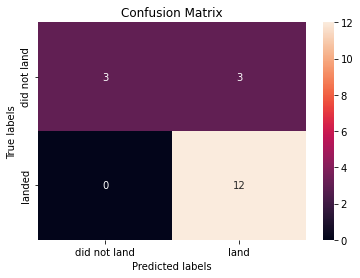

In [33]:
heat_confusion(Y_test,pred0)

In [34]:
accuracy=[]
methods=[]
accuracy.append(logreg_cv.score(X_test,Y_test))
methods.append('LogReg_cv')
logreg_cv.score(X_test,Y_test)

0.8333333333333334

In [44]:
#KNN alogrithem
knn=KNeighborsClassifier(n_neighbors=9)
parameters={'n_neighbors':[1,2,4,5,7,8,9,10]}
#tuned hyperparameters
knn=GridSearchCV(knn,parameters)
knn.fit(X_train,Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': [1, 2, 4, 5, 7, 8, 9, 10]})

In [45]:
print("tuned hyperparameters:(best parameters)", knn.best_params_, knn.best_score_)

tuned hyperparameters:(best parameters) {'n_neighbors': 4} 0.9057142857142857


In [47]:
knn.score(X_test,Y_test)


0.7777777777777778

In [48]:
pred1=knn.predict(X_test)

In [49]:
print(confusion_matrix(Y_test,pred1),classification_report(Y_test,pred1),accuracy_score(Y_test,pred1))

[[ 3  3]
 [ 1 11]]               precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.79      0.92      0.85        12

    accuracy                           0.78        18
   macro avg       0.77      0.71      0.72        18
weighted avg       0.77      0.78      0.76        18
 0.7777777777777778


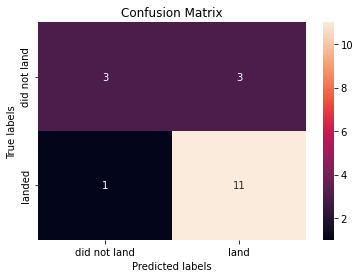

In [50]:
heat_confusion(Y_test,pred1)

In [51]:

accuracy.append(knn.score(X_test,Y_test))
methods.append('KNN')
knn.score(X_test,Y_test)

0.7777777777777778

In [61]:
#Desion Tree
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1,2, 4],
     'min_samples_split': [3, 6, 10]}

tree = DecisionTreeClassifier()

In [62]:
tree_cv = GridSearchCV(tree, parameters, cv = 10)
tree_cv.fit(X_train, Y_train)



GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [3, 6, 10],
                         'splitter': ['best', 'random']})

In [63]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}
accuracy : 0.9607142857142857


In [64]:
tree_cv.score(X_test,Y_test)

0.7777777777777778

In [65]:
pred3=tree_cv.predict(X_test)

In [66]:
print((pred3)
      ,Y_test)

[0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1] 76    0
26    1
3     0
35    1
19    1
14    0
37    1
68    1
38    1
21    1
61    1
63    1
48    1
60    0
82    1
41    1
59    0
45    0
Name: Class, dtype: int64


In [67]:
confusion_matrix(Y_test,pred3)

array([[ 4,  2],
       [ 2, 10]], dtype=int64)

In [68]:
accuracy_score(Y_test,pred3)

0.7777777777777778

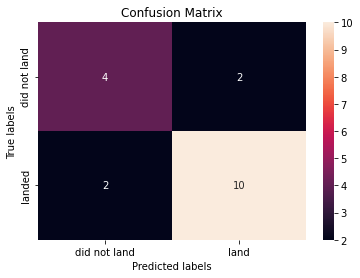

In [69]:
heat_confusion(Y_test,pred3)

In [70]:

accuracy.append(tree_cv.score(X_test,Y_test))
methods.append('DT')
tree_cv.score(X_test,Y_test)

0.7777777777777778

In [92]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
param_rf={'criterion': ['gini', 'entropy'],
     'min_samples_leaf': [ 2, 4],
     'min_samples_split': [2,5, 8]}
RFC=RandomForestClassifier()

In [93]:
rf_cv=GridSearchCV(RFC,param_rf,cv=3)
rf_cv.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5, 8]})

In [94]:
print(rf_cv.best_params_,rf_cv.best_score_)

{'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2} 0.9583333333333334


In [95]:
pred4=rf_cv.predict(X_test)

In [96]:
print(Y_test,pred4)

76    0
26    1
3     0
35    1
19    1
14    0
37    1
68    1
38    1
21    1
61    1
63    1
48    1
60    0
82    1
41    1
59    0
45    0
Name: Class, dtype: int64 [0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0]


In [97]:
confusion_matrix(Y_test,pred4)

array([[ 6,  0],
       [ 0, 12]], dtype=int64)

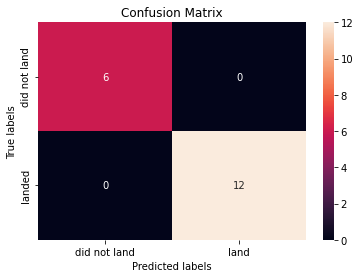

In [98]:
heat_confusion(Y_test,pred4)

In [99]:

accuracy.append(rf_cv.score(X_test,Y_test))
methods.append('RF')
rf_cv.score(X_test,Y_test)

1.0

In [100]:
#SVM model
svm=SVC()

In [108]:
param_svm={'C':[0.25,.5,1.5],'kernel': ['poly', 'rbf', 'sigmoid']}

In [109]:
svm_cv=GridSearchCV(svm,param_svm)
svm_cv.fit(X_train,Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.25, 0.5, 1.5],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [110]:
svm_cv.best_params_

{'C': 1.5, 'kernel': 'sigmoid'}

In [111]:
svm_cv.best_score_

0.9733333333333334

In [112]:
pred5=svm_cv.predict(X_test)

In [114]:
print(confusion_matrix(Y_test,pred5),accuracy_score(Y_test,pred5))

[[ 5  1]
 [ 0 12]] 0.9444444444444444


In [115]:
accuracy_score(Y_test,pred5)

0.9444444444444444

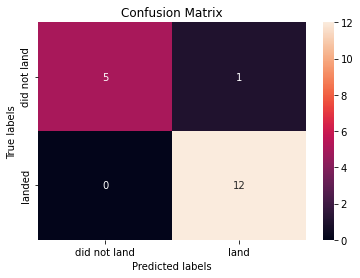

In [116]:
heat_confusion(Y_test,pred5)

In [117]:

accuracy.append(svm_cv.score(X_test,Y_test))
methods.append('SVM')
svm_cv.score(X_test,Y_test)

0.9444444444444444

Find the method performs best:


In [118]:
print(methods,accuracy)

['LogReg_cv', 'KNN', 'DT', 'RF', 'RF', 'RF', 'RF', 'SVM'] [0.8333333333333334, 0.7777777777777778, 0.7777777777777778, 1.0, 1.0, 1.0, 1.0, 0.9444444444444444]


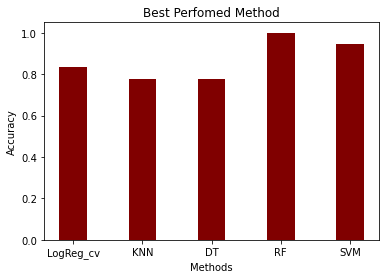

In [119]:
# creating the bar plot
plt.bar(methods, accuracy, color ='maroon',
        width = 0.4)
 
plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Best Perfomed Method")
plt.show()

Text(0.5, 1.0, 'under ROC')

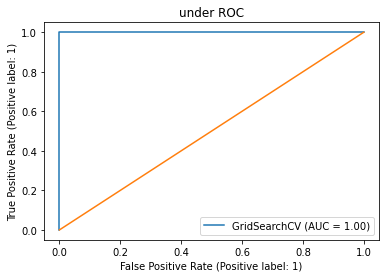

In [121]:
#ROC curve
RocCurveDisplay.from_estimator(svm_cv,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('under ROC')